In [56]:
from models.linear_regression.regression_closed import ClosedFormRegression
from models.linear_regression.regression_sgd import SGDRegression
import pandas as pd

In [36]:
data = pd.read_csv("/home/user/Documents/MLLab/ml-lab/data/auto-mpg.csv")
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']].values
y = data[['mpg']].values

In [8]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [26]:
# train the model
model = ClosedFormRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [85]:
# # print weights
# print("Weights:",model.weights)

# # print y_pred
# print("y_pred:",y_pred)

# pdiff = model.pdiff(y, y_pred)

# print("Pdiff:",pdiff)

# rss = model.rss(pdiff)
# print("RSS:",rss)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 2.6182640467289566
Mean Squared Error (MSE): 11.590170981415227
R-squared (R2): 0.8092552890383932


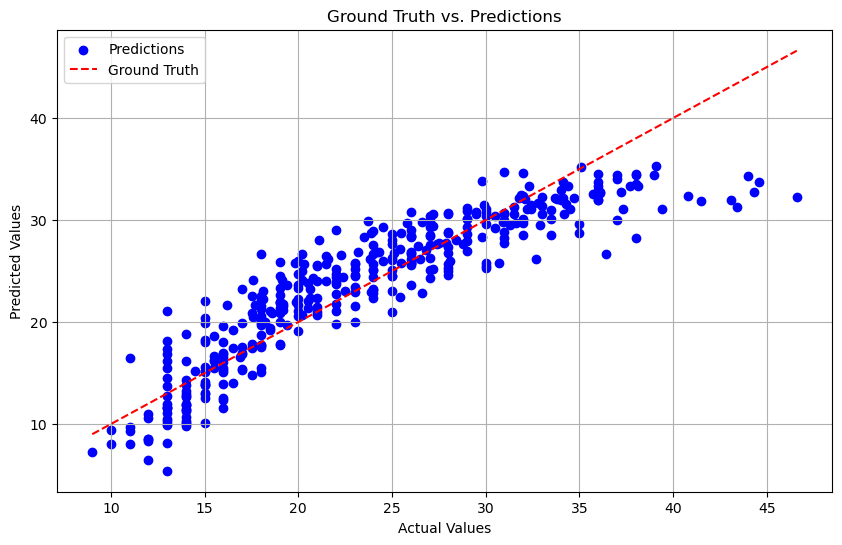

In [61]:
import matplotlib.pyplot as plt

# Plot ground truth vs. predictions
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ground Truth')
plt.title('Ground Truth vs. Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
X_max, y_max = X.max(axis=0), y.max(axis=0)
X_min, y_min = X.min(axis=0), y.min(axis=0)
X_mean, y_mean = X.mean(axis=0), y.mean(axis=0)
X_std, y_std = X.std(axis=0), y.std(axis=0)

# Standardization
Xs = (X - X_mean) / X_std

In [62]:
# train the model
model2 = SGDRegression()
model2.fit(Xs, y)
y_pred2 = model2.predict(Xs)

In [86]:
# # print weights
# print("Weights 2:",model2.weights)

# # print y_pred
# print("y_pred 2:",y_pred)

# pdiff = model2.pdiff(y, y_pred)

# print("Pdiff 2:",pdiff)

# rss = model2.rss(pdiff)
# print("RSS 2:",rss)

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred2)

# Calculate R-squared (R2)
r2 = r2_score(y, y_pred2)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 2.634881211643824
Mean Squared Error (MSE): 11.721313799661132
R-squared (R2): 0.807097012081037


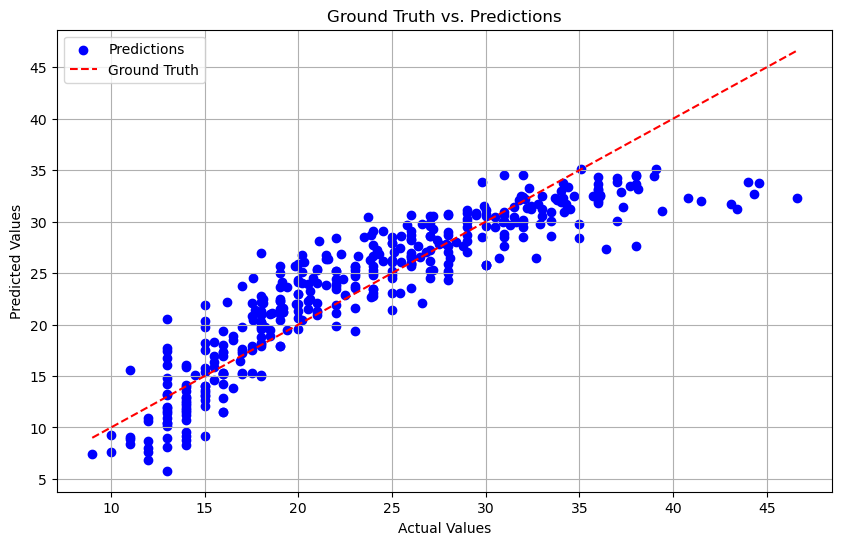

In [65]:
import matplotlib.pyplot as plt

# Plot ground truth vs. predictions
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred2, color='blue', label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ground Truth')
plt.title('Ground Truth vs. Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

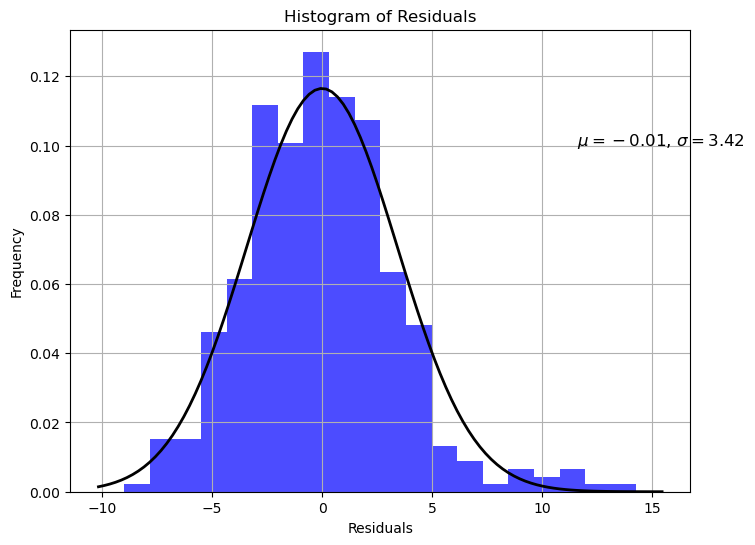

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Calculate residuals
residuals = y - y_pred2

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, density=True, color='blue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Fit a normal distribution to the residuals
mu, sigma = stats.norm.fit(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Add a legend with fit parameters
plt.text(xmax * 0.75, 0.1, f'$\mu={mu:.2f}$, $\sigma={sigma:.2f}$', fontsize=12)

plt.grid(True)
plt.show()


array([   8. ,  307. ,  130. , ..., 2720. ,   19.4,   82. ])

In [80]:
assert X.shape[0] == y.shape[0], "Number of samples in X and y must be the same"


In [79]:
X.shape, y.shape

((392, 6), (392, 1))

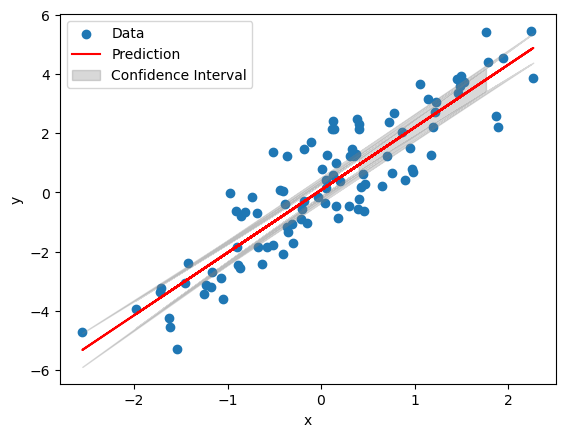

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate some random data
np.random.seed(0)
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 1, 100)

# Fit a linear regression model
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()

# Get the predicted values and confidence intervals
pred = results.get_prediction(X)
pred_mean = pred.predicted_mean
conf_int = pred.conf_int()

# Plot the data and confidence intervals
plt.scatter(x, y, label='Data')
plt.plot(x, pred_mean, color='red', label='Prediction')
plt.fill_between(x, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.3, label='Confidence Interval')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
